The workhorse for simulations from ARIMA models is `arima.sim`. To generate an AR(1) and an MA(1) processes using the function , one can use.

In [1]:
ar1 <- arima.sim(n = 100, model = list(ar = 0.9))
ma1 <- arima.sim(n = 100, model = list(ma = 0.8))

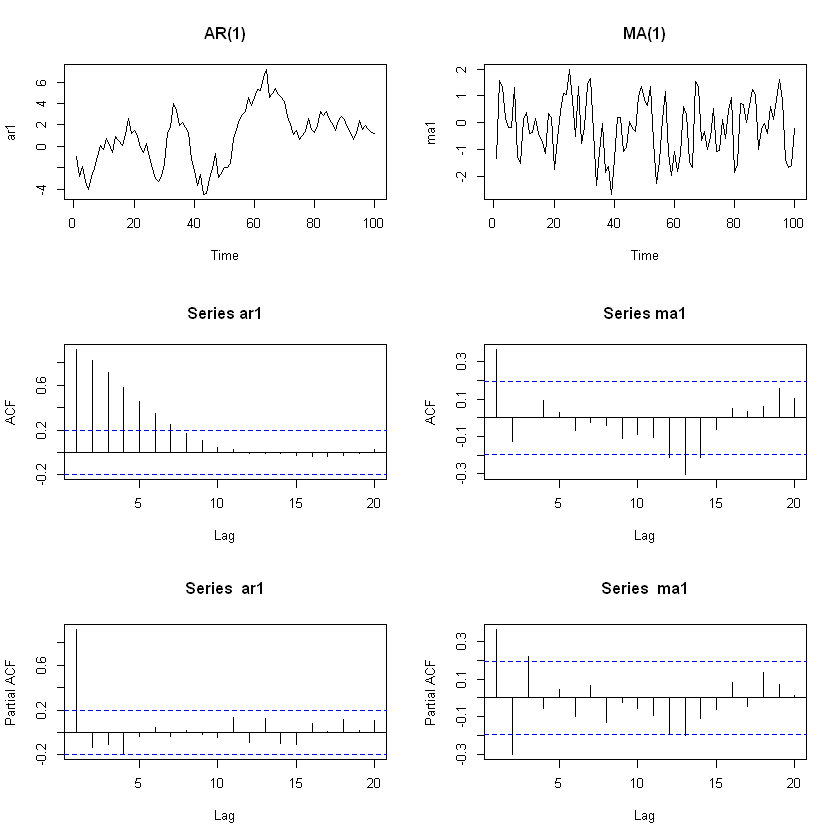

In [18]:
par(mfrow=c(3,2))
plot(ar1, main = 'AR(1)')
plot(ma1, main = 'MA(1)')
TSA::acf(ar1, na.action = na.pass)
TSA::acf(ma1, na.action = na.pass)
pacf(ar1, na.action = na.pass)
pacf(ma1, na.action = na.pass)

In [19]:
# Define the following function to generate an ARCH(1) process.

arch.sim1 <- function(n, a0 = 1, a1 = 0.9) {
    y <- eps <- rnorm(n)
    for (i in 2:n) y[i] <- eps[i] * sqrt(a0 + a1 * y[i - 1]^2)
    ts(y)
}
a0 <- 0.05
a1 <- 0.8
n <- 2000
y1 <- arch.sim1(n, a0, a1)

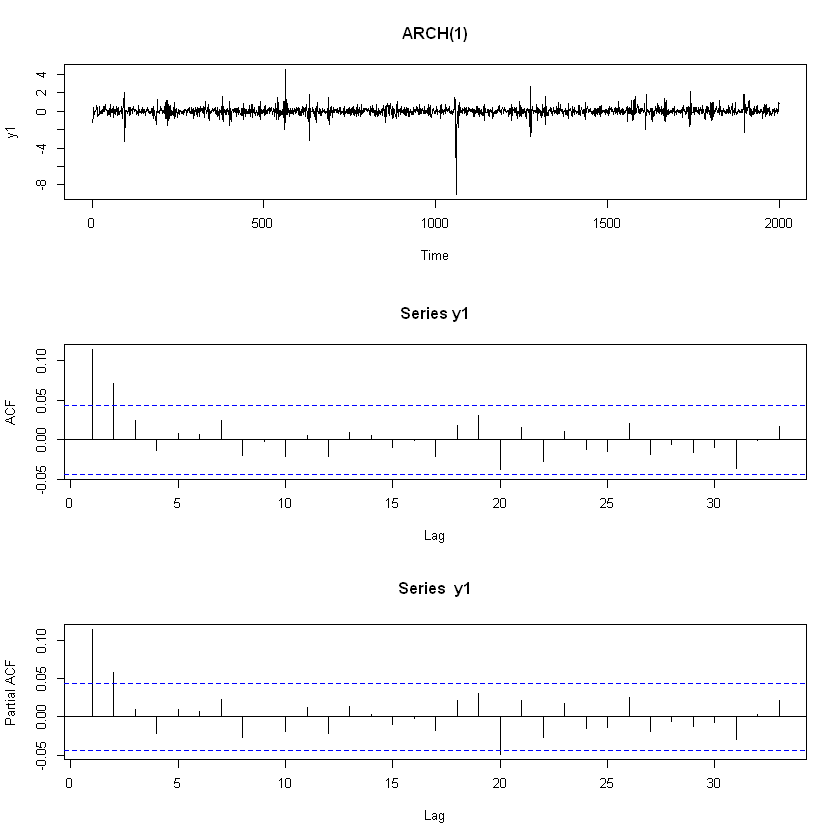

In [22]:
par(mfrow=c(3,1))
plot(y1, main = 'ARCH(1)')
TSA::acf(y1, na.action = na.pass)
pacf(y1, na.action = na.pass)

Use the second-order summaries functions to analyse the obtained process, the process of the squared values and the process of the absolute values.

Do it again with the following function, which has Student distributed variables as driving noise.

In [23]:
arch.sim2 <- function(n, df = 100, a0 = 1, a1 = 0.9) {
    y <- eps <- rt(n, df = df) * sqrt((df - 2)/df)
    for (i in 2:n) y[i] <- eps[i] * sqrt(a0 + a1 * y[i - 1]^2)
    ts(y)
}
a0 <- 0.05
a1 <- 0.8
n <- 2000
y1 <- arch.sim2(n, a0 = a0, a1 = a1)

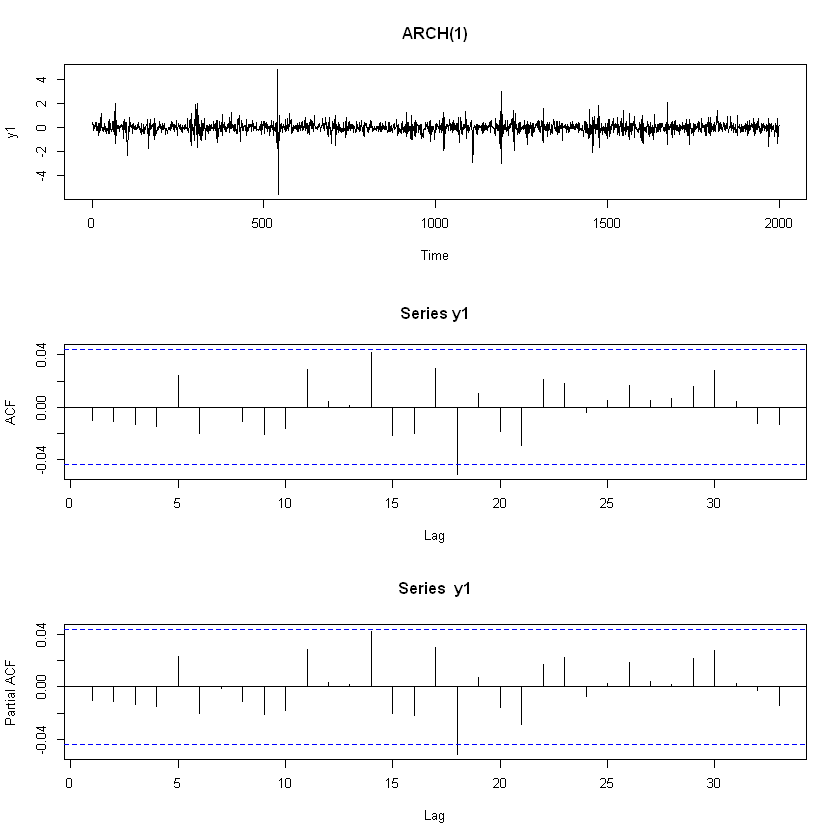

In [25]:
par(mfrow=c(3,1))
plot(y1, main = 'ARCH(1)')
TSA::acf(y1, na.action = na.pass)
pacf(y1, na.action = na.pass)

## Exercise 3: Simulated data

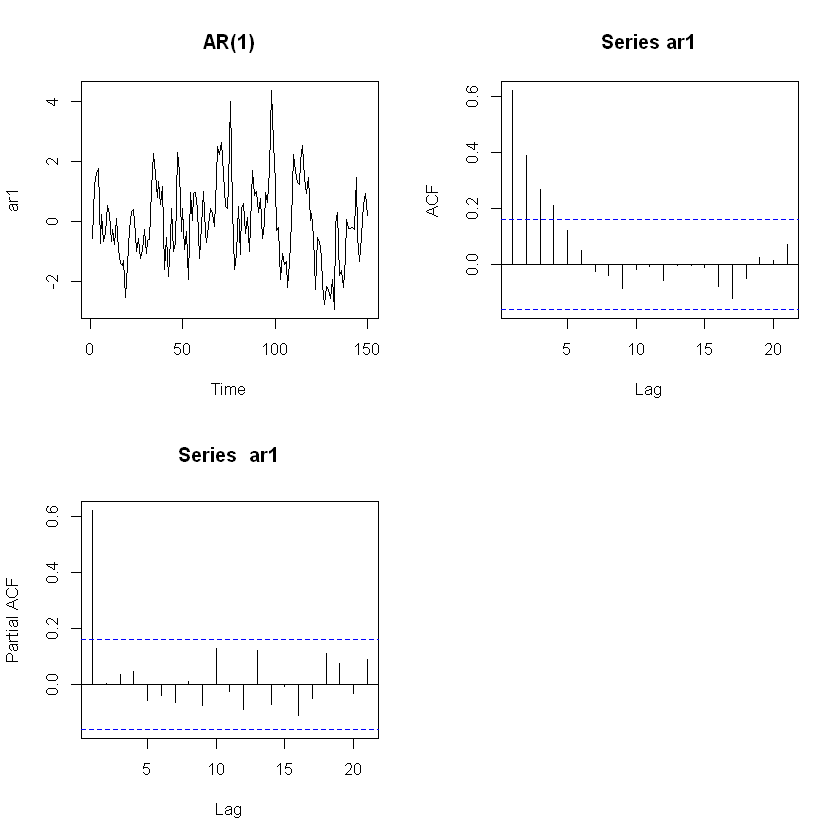

In [31]:
ar1 <- arima.sim(n = 150, model = list(ar = 0.6))

par(mfrow=c(2,2))
plot(ar1, main = 'AR(1)')
TSA::acf(ar1, na.action = na.pass)
pacf(ar1, na.action = na.pass)